In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#for data visualization
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.offline as py

import re  # For preprocessing
import spacy  # For preprocessing

import pandas as pd  # For data handling


from time import time  # To time our operations
#import logging  # Setting up the loggings to monitor gensim
#logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", datefmt = '%H:%M:%S', level = logging.INFO)

import pyLDAvis.gensim
import gensim

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from pprint import pprint

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

unable to import 'smart_open.gcs', disabling that module
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

C:\ProgramData\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly

C:\ProgramData\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [2]:
!dir "../Data/"

 Volume in drive D is Marcus
 Volume Serial Number is 9EEE-D0D6

 Directory of D:\Projects\Jupyter Notebook\Work\Capital One\Data

06/15/2020  03:33 PM    <DIR>          .
06/15/2020  03:33 PM    <DIR>          ..
06/27/2019  11:12 PM         6,422,711 as.xlsx
01/06/2020  03:15 PM         4,720,514 COF Customer Lifetime Data additional.xlsx
12/04/2019  04:24 PM         1,671,802 COF Customer Lifetime Data updated.xlsx
08/15/2019  02:28 PM         1,635,145 COF Customer Lifetime Data.xlsx
06/27/2019  11:33 PM         6,435,723 COF Data Immersion.xlsx
               5 File(s)     20,885,895 bytes
               2 Dir(s)  304,537,247,744 bytes free


In [3]:
data = pd.read_excel("../Data/COF Data Immersion.xlsx", sheet_name = "YTD 2018 to 2019 CSAT")

In [4]:
def mask_rating(string):
    if "Definitely recommend":
        return 5
    elif "Probably recommend":
        return 4
    elif "Might or Might not recommend":
        return 3
    elif "Prefers not to recommend":
        return 2
    elif "Probably not recommend":
        return 1 
    elif "Definitely not recommend":
        return 0

In [5]:
data["NPS"] = data["NPS"].apply(mask_rating)

In [6]:
data["Likelihood to Recommend (NPS)"].replace("I prefer not to recommend financial services",
                                              0,
                                              inplace = True)

In [7]:
new_data = data[["NPS", "Likelihood to Recommend (NPS)", "Likelihood to Recommend (NPS) Comment"]].dropna().reset_index(drop=True)

In [8]:
import vaderSentiment

In [9]:
new_data["Likelihood to Recommend (NPS) Comment"]

0       The customer care rep was friendly and helpful...
1       I enjoy using my Hudson day Card. I’ve never h...
2               It isa nighmare to get the card activated
3              Pleased with service and online facilities
4                                        Great experience
                              ...                        
4161                            It was a very minor call.
4162    I do believe that everyone should have a capit...
4163    HBC monthly card info is consistently accurate...
4164    I am a big supporter of Hudson's Bay, however,...
4165                                                 None
Name: Likelihood to Recommend (NPS) Comment, Length: 4166, dtype: object

In [10]:
def lemmatize_stemming(word):
    """
    Accepts a word and transforms it into stemmed and lemmatized
    
    :returns: lemmatized and stemmed word
    """
    return WordNetLemmatizer().lemmatize(word)

def preprocess(sentence):
    """
    Tokenizes the words in a string and removes the stopwords
    
    :returns: returns a list with lemmatized & stemmed tokenized words
    """
    
    result = []
    for token in gensim.utils.simple_preprocess(sentence):
        if isinstance(token, str) == True:
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
    return result

In [11]:
new_data

,NPS,Likelihood to Recommend (NPS),Likelihood to Recommend (NPS) Comment
0,5,4,The customer care rep was friendly and helpful...
1,5,5,I enjoy using my Hudson day Card. I’ve never h...
2,5,1,It isa nighmare to get the card activated
3,5,5,Pleased with service and online facilities
4,5,5,Great experience
...,...,...,...
4161,5,4,It was a very minor call.
4162,5,5,I do believe that everyone should have a capit...
4163,5,5,HBC monthly card info is consistently accurate...
4164,5,1,"I am a big supporter of Hudson's Bay, however,..."


In [12]:
new_data["Processed Text"] = new_data["Likelihood to Recommend (NPS) Comment"].map(preprocess)

In [13]:
new_data["Likelihood to Recommend (NPS)"].value_counts()

5    1444
4    1007
3     483
1     461
0     400
2     371
Name: Likelihood to Recommend (NPS), dtype: int64

In [14]:
new_data

,NPS,Likelihood to Recommend (NPS),Likelihood to Recommend (NPS) Comment,Processed Text
0,5,4,The customer care rep was friendly and helpful...,"[customer, care, friendly, helpful, hope, corr..."
1,5,5,I enjoy using my Hudson day Card. I’ve never h...,"[enjoy, hudson, card, issue, card, great, cust..."
2,5,1,It isa nighmare to get the card activated,"[nighmare, card, activated]"
3,5,5,Pleased with service and online facilities,"[pleased, service, online, facility]"
4,5,5,Great experience,"[great, experience]"
...,...,...,...,...
4161,5,4,It was a very minor call.,[minor]
4162,5,5,I do believe that everyone should have a capit...,"[believe, capital, card, great, best, service,..."
4163,5,5,HBC monthly card info is consistently accurate...,"[monthly, card, info, consistently, accurate, ..."
4164,5,1,"I am a big supporter of Hudson's Bay, however,...","[supporter, hudson, strongly, dislike, credit,..."


In [15]:
x = new_data[new_data["Likelihood to Recommend (NPS)"] >= 4]["Processed Text"]
x = x.apply(lambda x: " ".join(word for word in x))
x = " ".join([sent for sent in x])

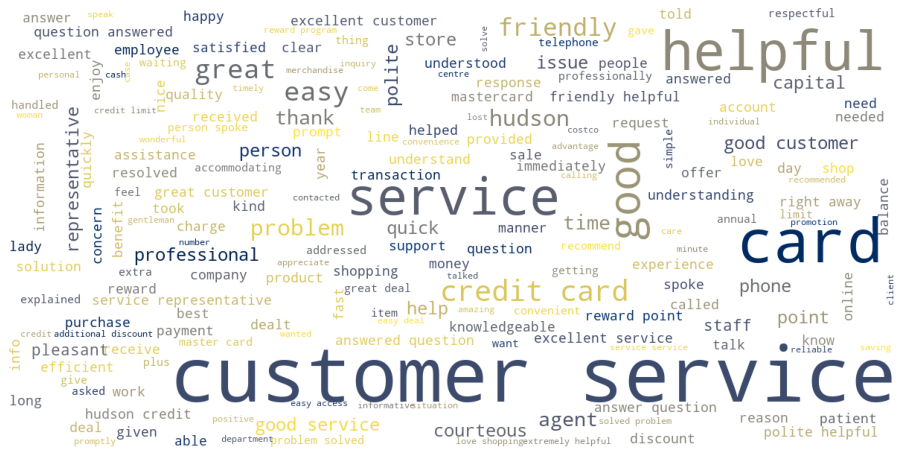

In [60]:
wordcloud = WordCloud(background_color = "white",
                      relative_scaling = 1,
                      margin=2,
                      scale = 3, 
                      colormap = "cividis").generate(x)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud, alpha = 1,interpolation="kaiser", aspect="equal")
plt.axis("off")
plt.show()

In [61]:
x = new_data[new_data["Likelihood to Recommend (NPS)"] < 4]["Processed Text"]
x = x.apply(lambda x: " ".join(word for word in x))
x = " ".join([sent for sent in x])

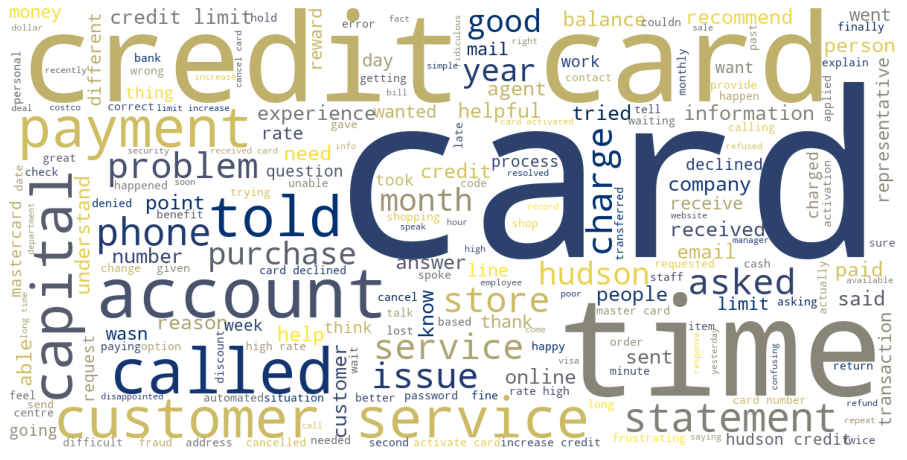

In [62]:
wordcloud = WordCloud(background_color = "white",
                      relative_scaling = 1,
                      margin=2,
                      scale = 3, 
                      colormap = "cividis").generate(x)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud, alpha = 1,interpolation="kaiser", aspect="equal")
plt.axis("off")
plt.show()